As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. O objetico é identificar padrões que determinam se um jogo tem sucesso ou não.

In [ ]:
## Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from scipy import stats as st

In [ ]:
## Carregando o arquivo de dados
df = pd.read_csv('/datasets/games.csv')

In [ ]:
# Primeira visualização do df
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Primeiras observações:
* O df possui 16715 linhas e 11 colunas
* A coluna "year_of_release" está como tipo float
* Existem dados faltantes nas colunas de score e rating
* Existem dados zerados em vendas de alguns jogos
* Os nomes das colunas começam com letra maiúscula
* As colunas de sales parecem estar ok

# Trabalhando as colunas de forma individual

## Nome das colunas

In [ ]:
# Colocando todas as letras minúsculas
df.columns = df.columns.str.lower()

In [ ]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Platform

In [ ]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
# Parece tudo ok com a coluna platform

## year_of_release

In [ ]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [ ]:
# Verificando quais linhas possui dados nan
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
# Verificando a % de dados faltantes
df['year_of_release'].isna().sum()/len(df['year_of_release'])

0.01609332934489979

Verificando a coluna percebi que a mesma possui 269 linhas com dados faltantes. O que caracteriza 1.6% da quantidade de dados.

Vou excluir essas linhas do DF

In [ ]:
df.dropna(subset = ['year_of_release'], inplace=True)

In [ ]:
# Os dados estão como tipo float, vou alterar para inteiros, pois não existem anos picados (EX: 1995.5), e não é necessário
# transformar em datetime, pois apenas o valor já nos atende.
df['year_of_release'] = df['year_of_release'].astype(int)
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

## Genre

In [ ]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [ ]:
# Verificando quais linhas possui dados nan
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
# Como existem apenas duas linhas em todo df com name e genre NaN, vou excluir elas
df.dropna(subset = ['genre'], inplace=True)

In [ ]:
# Conferindo
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


## critic_score

In [ ]:
# Verificando dados ausentes
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
df['critic_score'].isna().sum()/len(df['critic_score'])

0.5145341765993675

51.3% dos das linhas na coluna critic_score possuem dados ausentes. Desde jogos famosos a desconhecidos, de novos a antigos, de vários gêneros e plataformas, por isso não acho válido excluir ou tratar esses dados.

## user_score

In [ ]:
# Verificando dados ausentes
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
df['user_score'].isna().sum()/len(df['user_score'])

0.4016662612503041

40% dos das linhas na coluna user_score possuem dados ausentes. Desde jogos famosos a desconhecidos, de novos a antigos, de vários gêneros e plataformas, por isso não acho válido excluir ou tratar e}sses dados.

## rating

In [ ]:
# Verificando dados ausentes
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
df['rating'].isna().sum()/len(df['rating'])

0.40598394551204087

In [ ]:
df['rating'].isna()

0        False
1         True
2        False
3        False
4         True
         ...  
16710     True
16711     True
16712     True
16713     True
16714     True
Name: rating, Length: 16444, dtype: bool

In [ ]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Vou transformar a classificação em números, de 0 - 7, sgeuindo a lógica:

* EC - 0
* E / K-A - 1
* E10+ - 2
* RP - 3
* T - 4
* M - 5
* AO - 6



In [ ]:
df['rating'].replace('EC', 0, inplace = True)
df['rating'].replace('E', 1, inplace = True)
df['rating'].replace('K-A', 1, inplace = True)
df['rating'].replace('E10+', 2, inplace = True)
df['rating'].replace('RP', 3, inplace = True)
df['rating'].replace('T', 4, inplace = True)
df['rating'].replace('M', 5, inplace = True)
df['rating'].replace('AO', 6, inplace = True)
df['rating'].unique()

array([ 1., nan,  5.,  4.,  2.,  6.,  0.,  3.])

In [ ]:
# Verificando como é a distribuição do rating por genre
df.groupby('genre')['rating'].mean()

genre
Action          3.267474
Adventure       2.815909
Fighting        3.967593
Misc            2.040603
Platform        1.609626
Puzzle          1.214286
Racing          1.780374
Role-Playing    3.597403
Shooter         4.301205
Simulation      2.118068
Sports          1.510149
Strategy        2.981928
Name: rating, dtype: float64

In [ ]:
median_rating_genre = df.groupby('genre')['rating'].median().reset_index()
median_rating_genre

,genre,rating
0,Action,4.0
1,Adventure,2.0
2,Fighting,4.0
3,Misc,1.0
4,Platform,1.0
5,Puzzle,1.0
6,Racing,1.0
7,Role-Playing,4.0
8,Shooter,5.0
9,Simulation,1.0


Por se tratar de classificação de jogos, vou utilizar os valores das medianas por genero e vou alterar os valores NaN de acordo com a mediana por genero.

In [ ]:
merged_df = df.merge(median_rating_genre, on="genre", how="left")
merged_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_x,rating_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,1.0,1.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,1.0,1.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,1.0,1.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,4.0


In [ ]:
merged_df.loc[merged_df["rating_x"].isna(), "rating_x"] = merged_df.loc[merged_df["rating_x"].isna(), "rating_y"]
merged_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_x,rating_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,1.0,1.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,1.0,1.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,1.0,1.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,1.0,1.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,4.0,4.0


In [ ]:
df = merged_df.drop(columns = 'rating_y')
df.rename(columns = {'rating_x': 'rating'}, inplace = True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,1.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,1.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,1.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,1.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,4.0
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,1.0
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,2.0
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,1.0


40.5% dos das linhas na coluna user_score possuem dados ausentes. Como essa quantidade de dados ausentes podem interferir nos processos de análise, substitui os valore ausentes pela mediana do rating por genre, após transformar os genres para números de acordo com faixa etária.

## Criar coluna com total de vendas por jogo

In [ ]:
df['total_vendas']  = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,1.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,1.0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,1.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,1.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,4.0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,4.0,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,1.0,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,2.0,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,1.0,0.01


## Verificando duplicatas

In [ ]:
#Veriicando duplicatas
df.duplicated().sum()

0

Não existem dados duplicados

# Análises

## Verificando quantos jogos foram lançados por ano

In [ ]:
# Fazendo a contagem de jogos por ano
jogos_ano = df.groupby('year_of_release')['name'].count()
jogos_ano

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='name'>

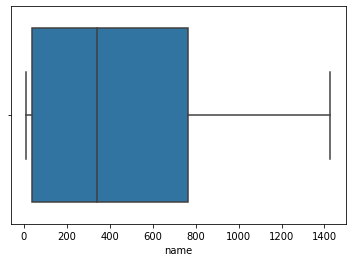

In [ ]:
sns.boxplot(jogos_ano)

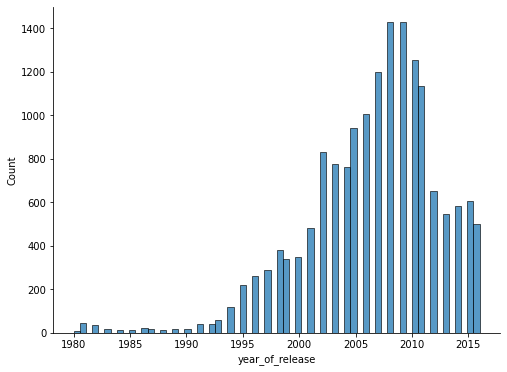

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'year_of_release', data = df)
sns.despine()

É possível perceber que antes dos anos 90 a quantidade de jogos eram baixas, foram aumentar a partir da década de 90, sendo que a partir de 2002, é quando começou a ter quantidades muito grandes de jogos, acima de 800 por ano, com o pico em 2008/2009 e dominuindo um pouco mais após 2012. Considero os dados significativos para todos os períodos.

## Variação de vendas por plataforma

In [ ]:
vendas_plataforma = pd.pivot_table(df, index= 'platform', values = 'total_vendas', aggfunc = 'sum').reset_index()
vendas_plataforma.sort_values(by='total_vendas', ascending = False)

,platform,total_vendas
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


As seis maiores plataformas por volume de vendas são:
- PS2
- X360
- PS3
- Wii
- DS
- PS


In [ ]:
vendas_plataforma_ano = pd.pivot_table(df, index= 'platform', values = 'year_of_release', aggfunc = ['min', 'max']).reset_index()
vendas_plataforma_ano['duracao'] = vendas_plataforma_ano['max'] - vendas_plataforma_ano['min']
vendas_plataforma_ano

,platform,min,max,duracao
,,year_of_release,year_of_release,
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4


In [ ]:
vendas_plataforma_ano = vendas_plataforma_ano.droplevel(level=1, axis=1)

In [ ]:
vendas_plataforma_ano = vendas_plataforma_ano.sort_values(by = 'min',ascending = True)
vendas_plataforma_ano = vendas_plataforma_ano.reset_index(drop = True)
vendas_plataforma_ano

,platform,min,max,duracao
0,2600,1980,1989,9
1,NES,1983,1994,11
2,DS,1985,2013,28
3,PC,1985,2016,31
4,GB,1988,2001,13
5,SNES,1990,1999,9
6,GEN,1990,1994,4
7,GG,1992,1992,0
8,SCD,1993,1994,1
9,NG,1993,1996,3


In [ ]:
vendas_plataforma_ano.describe()

,min,max,duracao
count,31.000000,31.000000,31.000000
mean,1997.645161,2005.258065,7.612903
std,9.094131,9.273503,6.998464
min,1980.000000,1989.000000,0.000000
25%,1992.500000,1996.000000,3.000000
50%,1996.000000,2007.000000,6.000000
75%,2004.500000,2016.000000,10.000000
max,2013.000000,2016.000000,31.000000


É possível perceber que as novas plataformas tem uma tendência de aparecer a cada 3 anos, e que a média que uma plataforma costuma performar é de aproximadamente 7 anos.

## Selecionando dados

Como vamos fazer uma previsão para o ano de 2017, e levando em conta que as plataformas tendem a ter uma duração de 7 anos, e o o total de vendas e as principais plataformas, vou utilizar os dados a partir de 2010.

In [ ]:
df_2010 = df.query('year_of_release >= 2010').reset_index(drop = True)
df_2010

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,1.0,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,5.0,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,5.0,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,4.0,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,5.0,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
5272,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,2.0,0.01
5273,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,1.0,0.01
5274,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,4.0,0.01
5275,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,2.0,0.01


## Analisando Plataformas com novo df

In [ ]:
#agrupando df pelo ano de lançamento da plataforma e a soma do total de vendas
vendas_plataforma_2010 = pd.pivot_table(df_2010, index= 'platform',  aggfunc = {'year_of_release':'min', 'total_vendas':'sum'} ).reset_index()
vendas_plataforma_2010 = vendas_plataforma_2010.sort_values(by = 'total_vendas',  ascending = False).reset_index(drop = True)
vendas_plataforma_2010

,platform,total_vendas,year_of_release
0,PS3,587.74,2010
1,X360,550.41,2010
2,PS4,314.14,2013
3,3DS,257.81,2011
4,Wii,222.97,2010
5,XOne,159.32,2013
6,DS,123.75,2010
7,PC,121.96,2010
8,WiiU,82.19,2012
9,PSP,64.05,2010


In [ ]:
vendas_plataforma_2010_maiores = vendas_plataforma_2010.drop([5,6,7,8,9,10,11])
vendas_plataforma_2010_maiores

,platform,total_vendas,year_of_release
0,PS3,587.74,2010
1,X360,550.41,2010
2,PS4,314.14,2013
3,3DS,257.81,2011
4,Wii,222.97,2010


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_of_release', ylabel='total_vendas'>

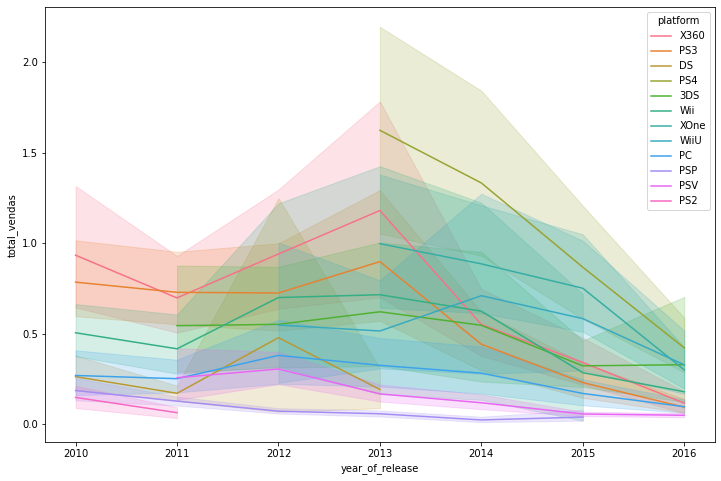

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot('year_of_release', 'total_vendas', hue = 'platform', data = df_2010, ax = ax)


No período a partir de 2010, os consoles que possuem maior venda são PS3 e X360. Considero o mais promissor, pelo ano de lançamento e valor já captado, PS4.

## Analisando as vendas por plataforma por rating

In [ ]:
# Para melhorar análise vou retirar os dados vazios do df
df_2010_filtrado = df_2010.dropna(subset = ['critic_score', 'user_score'])
df_2010_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2305 entries, 0 to 5271
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2305 non-null   object 
 1   platform         2305 non-null   object 
 2   year_of_release  2305 non-null   int64  
 3   genre            2305 non-null   object 
 4   na_sales         2305 non-null   float64
 5   eu_sales         2305 non-null   float64
 6   jp_sales         2305 non-null   float64
 7   other_sales      2305 non-null   float64
 8   critic_score     2305 non-null   float64
 9   user_score       2305 non-null   object 
 10  rating           2305 non-null   float64
 11  total_vendas     2305 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 234.1+ KB


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


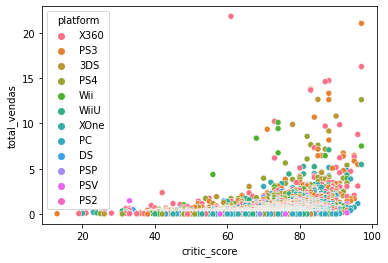

In [ ]:
sns.scatterplot('critic_score', 'total_vendas',hue= 'platform', data = df_2010_filtrado);

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


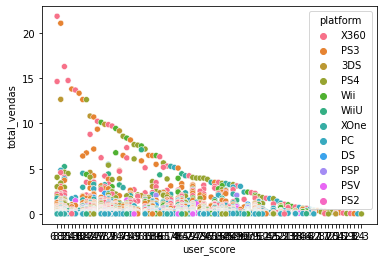

In [ ]:
sns.scatterplot('user_score', 'total_vendas',hue= 'platform', data = df_2010_filtrado);

In [ ]:
df_2010_filtrado['critic_score'].unique()

array([61., 97., 88., 87., 83., 85., 90., 84., 73., 74., 78., 91., 71.,
       96., 82., 68., 92., 95., 86., 76., 93., 81., 80., 89., 94., 77.,
       56., 70., 72., 79., 75., 66., 42., 64., 67., 57., 65., 55., 63.,
       54., 33., 59., 52., 60., 69., 45., 53., 62., 47., 48., 39., 49.,
       51., 43., 40., 50., 32., 58., 41., 34., 38., 44., 46., 31., 26.,
       36., 23., 35., 24., 37., 21., 19., 28., 20., 25., 13.])

In [ ]:
df_2010_filtrado.loc[df_2010_filtrado['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
198,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,1.0,2.42
525,LEGO Star Wars III: The Clone Wars,DS,2011,Action,0.61,0.38,0.0,0.10,66.0,tbd,1.0,1.09
651,LEGO Pirates of the Caribbean: The Video Game,DS,2011,Action,0.34,0.46,0.0,0.10,69.0,tbd,2.0,0.90
655,The Biggest Loser: Ultimate Workout,X360,2010,Sports,0.73,0.10,0.0,0.06,68.0,tbd,1.0,0.89
683,Pictionary,Wii,2010,Puzzle,0.60,0.19,0.0,0.07,71.0,tbd,1.0,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...
4522,Duke Nukem 3D: 20th Anniversary World Tour,XOne,2016,Shooter,0.02,0.00,0.0,0.00,70.0,tbd,5.0,0.02
4539,Assault Suit Leynos,PS4,2016,Shooter,0.02,0.00,0.0,0.00,67.0,tbd,2.0,0.02
4661,Dragon's Lair,DS,2010,Platform,0.02,0.00,0.0,0.00,63.0,tbd,2.0,0.02
4901,Turbo: Super Stunt Squad,PS3,2013,Sports,0.00,0.01,0.0,0.00,38.0,tbd,1.0,0.01


In [ ]:
# Retirando tbd ("to be determined") do df
df_2010_filtrado = df_2010_filtrado.loc[df_2010_filtrado['user_score'] != 'tbd']
df_2010_filtrado['user_score'] = df_2010_filtrado['user_score'].astype(float)
df_2010_filtrado

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,1.0,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,5.0,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,5.0,16.27
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,5.0,14.73
6,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,5.0,14.62
...,...,...,...,...,...,...,...,...,...,...,...,...
5249,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,1.0,0.01
5255,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,4.0,0.01
5268,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,5.0,0.01
5269,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,4.0,0.01


In [ ]:
df_2010_filtrado.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
year_of_release,1.000000,-0.105896,-0.032097,-0.037307,-0.050592,0.101086,-0.005576,0.027022,-0.077862
na_sales,-0.105896,1.000000,0.745835,0.254248,0.767778,0.277459,0.038614,0.027269,0.928759
eu_sales,-0.032097,0.745835,1.000000,0.333754,0.944813,0.301021,0.029304,0.024975,0.926733
jp_sales,-0.037307,0.254248,0.333754,1.000000,0.281961,0.126060,0.165214,-0.070604,0.417265
other_sales,-0.050592,0.767778,0.944813,0.281961,1.000000,0.297035,0.041417,0.049153,0.917554
critic_score,0.101086,0.277459,0.301021,0.126060,0.297035,1.000000,0.550646,0.007045,0.311028
user_score,-0.005576,0.038614,0.029304,0.165214,0.041417,0.550646,1.000000,0.078421,0.056672
rating,0.027022,0.027269,0.024975,-0.070604,0.049153,0.007045,0.078421,1.000000,0.021101
total_vendas,-0.077862,0.928759,0.926733,0.417265,0.917554,0.311028,0.056672,0.021101,1.000000


É possível perceber que existe uma pequena relação positiva entre a avaliação dos profissionais e o valor total de venda. Já para os a avaliação dos usuários, a relação é praticamente nula.

## Analisando vendas por genre

In [ ]:
pd.pivot_table(df_2010, index='genre', values='total_vendas', aggfunc = 'sum').reset_index().sort_values(by = 'total_vendas', ascending = False)

,genre,total_vendas
0,Action,673.09
8,Shooter,479.74
10,Sports,328.39
7,Role-Playing,315.28
3,Misc,234.56
6,Racing,122.68
4,Platform,119.72
2,Fighting,81.59
9,Simulation,71.75
1,Adventure,61.00


Podemos ver que os generos que mais venderam no período foram de action (muito acima dos demais), Shooter, Sorts e Role-Playing. O que pode demonstrar que o público prefere estes tipos de jogos.

## Dividindo os usuários por região

### NA

In [ ]:
# Criando um DF apenas com dados de na_sales
df_2010_na = df_2010.drop(columns = ['eu_sales', 'jp_sales', 'other_sales'] )
df_2010_na

,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating,total_vendas
0,Kinect Adventures!,X360,2010,Misc,15.00,61.0,6.3,1.0,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,97.0,8.2,5.0,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,97.0,8.1,5.0,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,NaN,NaN,4.0,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,88.0,3.4,5.0,14.73
...,...,...,...,...,...,...,...,...,...
5272,Strawberry Nauts,PSV,2016,Adventure,0.00,NaN,NaN,2.0,0.01
5273,Aiyoku no Eustia,PSV,2014,Misc,0.00,NaN,NaN,1.0,0.01
5274,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,NaN,NaN,4.0,0.01
5275,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,NaN,NaN,2.0,0.01


In [ ]:
# Agrupando por platform
df_2010_na_platform = df_2010_na.groupby('platform')['na_sales'].sum().reset_index().sort_values(by= 'na_sales', ascending = False)
df_2010_na_platform

,platform,na_sales
10,X360,334.18
4,PS3,229.25
8,Wii,121.20
5,PS4,108.74
11,XOne,93.12
0,3DS,82.65
1,DS,59.66
2,PC,39.07
9,WiiU,38.10
7,PSV,12.47


In [ ]:
# Agrupando por genre
df_2010_na_genre = df_2010_na.groupby('genre')['na_sales'].sum().reset_index().sort_values(by= 'na_sales', ascending = False)
df_2010_na_genre

,genre,na_sales
0,Action,290.64
8,Shooter,237.47
10,Sports,156.81
3,Misc,123.80
7,Role-Playing,112.05
4,Platform,54.90
6,Racing,46.11
2,Fighting,39.05
9,Simulation,26.39
1,Adventure,20.84


In [ ]:
# Agrupando por rating
df_2010_na_rating = df_2010_na.groupby('rating')['na_sales'].sum().reset_index().sort_values(by= 'na_sales', ascending = False)
df_2010_na_rating

,rating,na_sales
5,5.0,404.98
1,1.0,318.98
4,4.0,240.18
2,2.0,165.14
0,0.0,1.13
3,3.0,0.00


Sobre o perfil dos usuários da região NA, podemos perceber que:
* As 5 maiores plataformas são:
    - X360
    - PS3
    - Wii
    - Ps4
    - XOne
* Os generos que mais vendem são:
    - Action
    - Shooter
    - Sports
* Sobre o Rating:
    - Quanto maior a classificação de faixa etária, maiorestendem ser as vendas, pela conversão feita anteriormente, os jogos que tem classificação M, E/K-A, T são os mais vendidos, nesta ordem.

### EU

In [ ]:
# Criando um DF apenas com dados de eu_sales
df_2010_eu = df_2010.drop(columns = ['na_sales', 'jp_sales', 'other_sales'] )
df_2010_eu

,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating,total_vendas
0,Kinect Adventures!,X360,2010,Misc,4.89,61.0,6.3,1.0,21.82
1,Grand Theft Auto V,PS3,2013,Action,9.09,97.0,8.2,5.0,21.05
2,Grand Theft Auto V,X360,2013,Action,5.14,97.0,8.1,5.0,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,3.17,NaN,NaN,4.0,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,4.24,88.0,3.4,5.0,14.73
...,...,...,...,...,...,...,...,...,...
5272,Strawberry Nauts,PSV,2016,Adventure,0.00,NaN,NaN,2.0,0.01
5273,Aiyoku no Eustia,PSV,2014,Misc,0.00,NaN,NaN,1.0,0.01
5274,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,NaN,NaN,4.0,0.01
5275,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,NaN,NaN,2.0,0.01


In [ ]:
# Agrupando por platform
df_2010_eu_platform = df_2010_eu.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by= 'eu_sales', ascending = False)
df_2010_eu_platform

,platform,eu_sales
4,PS3,213.60
10,X360,163.41
5,PS4,141.09
2,PC,68.82
8,Wii,65.91
0,3DS,61.27
11,XOne,51.59
1,DS,28.06
9,WiiU,25.13
7,PSV,13.07


In [ ]:
# Agrupando por genre
df_2010_eu_genre = df_2010_eu.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by= 'eu_sales', ascending = False)
df_2010_eu_genre

,genre,eu_sales
0,Action,233.63
8,Shooter,171.45
10,Sports,116.84
7,Role-Playing,75.48
3,Misc,66.09
6,Racing,54.75
4,Platform,38.30
9,Simulation,26.39
2,Fighting,20.33
1,Adventure,18.88


In [ ]:
# Agrupando por rating
df_2010_eu_rating = df_2010_eu.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by= 'eu_sales', ascending = False)
df_2010_eu_rating

,rating,eu_sales
5,5.0,311.04
1,1.0,255.54
4,4.0,169.87
2,2.0,104.73
3,3.0,0.03
0,0.0,0.00


Sobre o perfil dos usuários da região EU, podemos perceber que:
* As 5 maiores plataformas são:
    - PS3
    - X360
    - PS4
    - PC
    - WII
* Os generos que mais vendem são:
    - Action
    - Shooter
    - Sports
* Sobre o Rating:
    - Quanto maior a classificação de faixa etária, maiorestendem ser as vendas, pela conversão feita anteriormente, os jogos que tem classificação M, E/K-A, T são os mais vendidos, nesta ordem.

### JP

In [ ]:
# Criando um DF apenas com dados de jp_sales
df_2010_jp = df_2010.drop(columns = ['na_sales', 'eu_sales', 'other_sales'] )
df_2010_jp

,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating,total_vendas
0,Kinect Adventures!,X360,2010,Misc,0.24,61.0,6.3,1.0,21.82
1,Grand Theft Auto V,PS3,2013,Action,0.98,97.0,8.2,5.0,21.05
2,Grand Theft Auto V,X360,2013,Action,0.06,97.0,8.1,5.0,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.65,NaN,NaN,4.0,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,0.13,88.0,3.4,5.0,14.73
...,...,...,...,...,...,...,...,...,...
5272,Strawberry Nauts,PSV,2016,Adventure,0.01,NaN,NaN,2.0,0.01
5273,Aiyoku no Eustia,PSV,2014,Misc,0.01,NaN,NaN,1.0,0.01
5274,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.01,NaN,NaN,4.0,0.01
5275,Haitaka no Psychedelica,PSV,2016,Adventure,0.01,NaN,NaN,2.0,0.01


In [ ]:
# Agrupando por platform
df_2010_jp_platform = df_2010_jp.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by= 'jp_sales', ascending = False)
df_2010_jp_platform

,platform,jp_sales
0,3DS,100.62
4,PS3,59.26
6,PSP,42.20
1,DS,27.90
7,PSV,21.84
8,Wii,17.75
5,PS4,15.96
9,WiiU,13.01
10,X360,5.46
3,PS2,0.80


In [ ]:
# Agrupando por genre
df_2010_jp_genre = df_2010_jp.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by= 'jp_sales', ascending = False)
df_2010_jp_genre

,genre,jp_sales
7,Role-Playing,103.54
0,Action,72.20
3,Misc,24.29
4,Platform,15.81
1,Adventure,15.67
10,Sports,15.51
8,Shooter,14.04
2,Fighting,13.90
9,Simulation,13.30
11,Strategy,6.80


In [ ]:
# Agrupando por rating
df_2010_jp_rating = df_2010_jp.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by= 'jp_sales', ascending = False)
df_2010_jp_rating

,rating,jp_sales
4,4.0,164.18
1,1.0,81.95
5,5.0,32.07
2,2.0,26.94
0,0.0,0.00
3,3.0,0.00


Sobre o perfil dos usuários da região JP, podemos perceber que:
* As 5 maiores plataformas são:
    - 3DS
    - PS3
    - PSP
    - DS
    - PSV
* Os generos que mais vendem são:
    - Role-Playing
    - Action
    - Misc
* Sobre o Rating:
    - Quanto maior a classificação de faixa etária, maiorestendem ser as vendas, pela conversão feita anteriormente, os jogos que tem classificação T, E/K-A, M são os mais vendidos, nesta ordem.

### Fazendo um comparativo entre todas as regiões

#### Genre

In [ ]:
df_sales_genre = df_2010.groupby('genre')['total_vendas'].sum().reset_index().sort_values(by = 'total_vendas', ascending = False)
df_sales_genre

,genre,total_vendas
0,Action,673.09
8,Shooter,479.74
10,Sports,328.39
7,Role-Playing,315.28
3,Misc,234.56
6,Racing,122.68
4,Platform,119.72
2,Fighting,81.59
9,Simulation,71.75
1,Adventure,61.00


In [ ]:
# Juntando o total de vendas com na-sales por genero
df_sales_genre = df_sales_genre.merge(df_2010_na_genre)
df_sales_genre

,genre,total_vendas,na_sales
0,Action,673.09,290.64
1,Shooter,479.74,237.47
2,Sports,328.39,156.81
3,Role-Playing,315.28,112.05
4,Misc,234.56,123.80
5,Racing,122.68,46.11
6,Platform,119.72,54.90
7,Fighting,81.59,39.05
8,Simulation,71.75,26.39
9,Adventure,61.00,20.84


In [ ]:
# Juntando o total de vendas com eu-sales por genero
df_sales_genre = df_sales_genre.merge(df_2010_eu_genre)
df_sales_genre

,genre,total_vendas,na_sales,eu_sales
0,Action,673.09,290.64,233.63
1,Shooter,479.74,237.47,171.45
2,Sports,328.39,156.81,116.84
3,Role-Playing,315.28,112.05,75.48
4,Misc,234.56,123.80,66.09
5,Racing,122.68,46.11,54.75
6,Platform,119.72,54.90,38.30
7,Fighting,81.59,39.05,20.33
8,Simulation,71.75,26.39,26.39
9,Adventure,61.00,20.84,18.88


In [ ]:
# Juntando o total de vendas com jp-sales por genero
df_sales_genre = df_sales_genre.merge(df_2010_jp_genre)
df_sales_genre

,genre,total_vendas,na_sales,eu_sales,jp_sales
0,Action,673.09,290.64,233.63,72.20
1,Shooter,479.74,237.47,171.45,14.04
2,Sports,328.39,156.81,116.84,15.51
3,Role-Playing,315.28,112.05,75.48,103.54
4,Misc,234.56,123.80,66.09,24.29
5,Racing,122.68,46.11,54.75,6.68
6,Platform,119.72,54.90,38.30,15.81
7,Fighting,81.59,39.05,20.33,13.90
8,Simulation,71.75,26.39,26.39,13.30
9,Adventure,61.00,20.84,18.88,15.67


Podemos perceber que os maiores gêneros por total de vendas são:
* Action
* Shooter
* Sports
* Role-Playing
* Music

E que a região NA é a que possui o maior volume de compras em todos os generos, sendo que a região EU segue o mesmo padrão da primeira. Na região JP as vendas variam com outros gêneros a frente das vendas, podemos colocar que podem ser generos menos violentos.

#### Platform

In [ ]:
df_sales_platform = df_2010.groupby('platform')['total_vendas'].sum().reset_index().sort_values(by = 'total_vendas', ascending = False)
df_sales_platform

,platform,total_vendas
4,PS3,587.74
10,X360,550.41
5,PS4,314.14
0,3DS,257.81
8,Wii,222.97
11,XOne,159.32
1,DS,123.75
2,PC,121.96
9,WiiU,82.19
6,PSP,64.05


In [ ]:
# Juntando o total de vendas com na-sales por genero
df_sales_platform = df_sales_platform.merge(df_2010_na_platform)
df_sales_platform

,platform,total_vendas,na_sales
0,PS3,587.74,229.25
1,X360,550.41,334.18
2,PS4,314.14,108.74
3,3DS,257.81,82.65
4,Wii,222.97,121.20
5,XOne,159.32,93.12
6,DS,123.75,59.66
7,PC,121.96,39.07
8,WiiU,82.19,38.10
9,PSP,64.05,9.65


In [ ]:
# Juntando o total de vendas com eu-sales por genero
df_sales_platform = df_sales_platform.merge(df_2010_eu_platform)
df_sales_platform

,platform,total_vendas,na_sales,eu_sales
0,PS3,587.74,229.25,213.60
1,X360,550.41,334.18,163.41
2,PS4,314.14,108.74,141.09
3,3DS,257.81,82.65,61.27
4,Wii,222.97,121.20,65.91
5,XOne,159.32,93.12,51.59
6,DS,123.75,59.66,28.06
7,PC,121.96,39.07,68.82
8,WiiU,82.19,38.10,25.13
9,PSP,64.05,9.65,7.59


In [ ]:
# Juntando o total de vendas com jp-sales por genero
df_sales_platform = df_sales_platform.merge(df_2010_jp_platform)
df_sales_platform

,platform,total_vendas,na_sales,eu_sales,jp_sales
0,PS3,587.74,229.25,213.60,59.26
1,X360,550.41,334.18,163.41,5.46
2,PS4,314.14,108.74,141.09,15.96
3,3DS,257.81,82.65,61.27,100.62
4,Wii,222.97,121.20,65.91,17.75
5,XOne,159.32,93.12,51.59,0.34
6,DS,123.75,59.66,28.06,27.90
7,PC,121.96,39.07,68.82,0.00
8,WiiU,82.19,38.10,25.13,13.01
9,PSP,64.05,9.65,7.59,42.20


Podemos perceber que os maiores plataforma por total de vendas são:
* PS3
* X360
* PS4
* 3DS
* WII

E que a região NA é a que possui o maior volume de compras em quase todos as plataformas, sendo que a região EU segue quase o mesmo padrão da primeira, mas eles preferem PC por 3DS. Na região JP as vendas variam com outros plataformas a frente das vendas, podemos colocar que podem ser plataformas mais portáteis.

# Hipóteses

## As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas

Ou seja, a hipótese alternativa é de que as médias dos usuários das plataformas Xbox One e PC são distintas.

In [ ]:
# Vamos separar dos dados classificações dos usuários para as duas plataformas:
xbox_one = df_2010_filtrado.loc[df_2010_filtrado['platform'] == 'XOne']
xbox_one['user_score']

58      7.9
61      5.4
78      6.4
90      6.2
115     4.1
       ... 
5099    7.5
5129    6.3
5219    6.0
5237    8.2
5255    6.7
Name: user_score, Length: 165, dtype: float64

In [ ]:
pc = df_2010_filtrado.loc[df_2010_filtrado['platform'] == 'PC']
pc['user_score']

66      4.0
71      8.2
103     8.1
143     3.9
151     5.9
       ... 
5177    7.9
5211    7.9
5268    7.6
5269    5.8
5271    7.2
Name: user_score, Length: 348, dtype: float64

In [ ]:
# vou usar o alpha = 0.05
alpha = 0.05

In [ ]:
results = st.ttest_ind(xbox_one['user_score'], pc['user_score'],equal_var = False)

In [ ]:
print('p-value:', results.pvalue)

p-value: 0.9127457287129067


In [ ]:
if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

Nós não podemos rejeitar a hipótese nula


Utilizando o método Hipótese sobre a Igualdade das Médias de Duas Populações, pois não podemos afirmar que os mesmos usuários usam o Xbox One e PC. Existe uma possibilidade de 91.3% de que as classificações dos usuários de Xbox One e Pc sejam as mesmas. Não podemos descartar esta hipótese.

## As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes

Esta é a hipótese acima é a alternativa. A nula é: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais

In [ ]:
action = df_2010_filtrado.loc[df_2010_filtrado['genre'] == 'Action']
action['user_score']

1       8.2
2       8.1
13      8.3
29      6.6
43      8.3
       ... 
5211    7.9
5219    6.0
5249    8.5
5255    6.7
5268    7.6
Name: user_score, Length: 675, dtype: float64

In [ ]:
sports = df_2010_filtrado.loc[df_2010_filtrado['genre'] == 'Sports']
sports['user_score']

27      4.3
33      5.0
47      4.3
53      7.4
54      5.7
       ... 
4840    6.4
4882    6.0
5006    6.3
5021    6.9
5059    5.5
Name: user_score, Length: 242, dtype: float64

In [ ]:
# vou usar o alpha = 0.05
alpha = 0.05

In [ ]:
results = st.ttest_ind(action['user_score'], sports['user_score'],equal_var = False)

In [ ]:
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

p-value: 8.946726392719975e-10
Nós rejeitamos a hipótese nula


Utilizando o método Hipótese sobre a Igualdade das Médias de Duas Populações, pois não podemos afirmar que os mesmos usuários jogam jogos de ação e esportes. Podemos rejeitar as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais. e Não anulamos que as classificações destes dois gêneros são diferentes.

# Conclusão

Levando em conta que o estudo é para ajudar a determinar o lançamento de um próximo jogo, fizemos diversos estudos e análises sobre regiões, vendas, plataformas e generos.

Com isso o que estudamos, para o jogo ter sucesso, podemos focar na região NA que possui números mais expressivos de vendas, em comparação com o restante das regiões.

Pensando nela, sugiro que as 05 plataformas mais ápitas para o jogo são:
* PS3
* X360
* PS4
* 3DS
* WII

Acredito que o foco seje no PS4, pois é um plataforma nova (em relação as outras) e que já vem performando muito bem.



Em relação ao genero, os mais vendidos mundialmente e que atendem a todas as regiões são:
* Action
* Shooter
* Sports
* Role-Playing
* Music

Com a preferência de vendas sendo jogos de ação (action).

Acredito que uma combinação dos estudos acima possuem maiores chances de sucesso de vendas.